In [2]:
import sys
import os

# moce two directories up and make that current directory
os.chdir("../..")
# print current directory
print(os.getcwd())

/Users/chinmayshrivastava/Documents/GitHub/RepoStateManager


In [3]:
from modules.tables.TableReader import TableReader

tr = TableReader(
    "tests/TableTransformer/FMDS0809-2018-07-Storage-of-Class-1-2-3-4-and-Plastic-Commodities-8-9.pdf",
)

/Users/chinmayshrivastava/Documents/GitHub/RepoStateManager/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1/1 [00:00<00:00,  8.43it/s]


In [4]:
tables = tr._extract_all_tables()
tables

[[<modules.images.ImageReader.ImageReader at 0x120968790>]]

In [5]:
cells = tr._extract_structure_from_table(tables[0][0])
cells

[{'label': 'table spanning cell',
  'score': 0.6935645937919617,
  'bbox': [1023.671630859375,
   471.1477355957031,
   1148.980712890625,
   611.9994506835938]},
 {'label': 'table column',
  'score': 0.9998070597648621,
  'bbox': [123.5329818725586,
   -0.19804233312606812,
   275.0546875,
   663.7985229492188]},
 {'label': 'table row',
  'score': 0.8568186163902283,
  'bbox': [9.488269805908203,
   145.55157470703125,
   1148.6285400390625,
   187.77029418945312]},
 {'label': 'table spanning cell',
  'score': 0.7612911462783813,
  'bbox': [577.0765991210938,
   315.8960876464844,
   720.7862548828125,
   377.5713806152344]},
 {'label': 'table row',
  'score': 0.5340184569358826,
  'bbox': [8.6265230178833,
   639.4779663085938,
   1149.400146484375,
   663.2788696289062]},
 {'label': 'table spanning cell',
  'score': 0.9867206811904907,
  'bbox': [275.1197814941406,
   0.23180116713047028,
   432.9151611328125,
   84.92044067382812]},
 {'label': 'table spanning cell',
  'score': 0.55

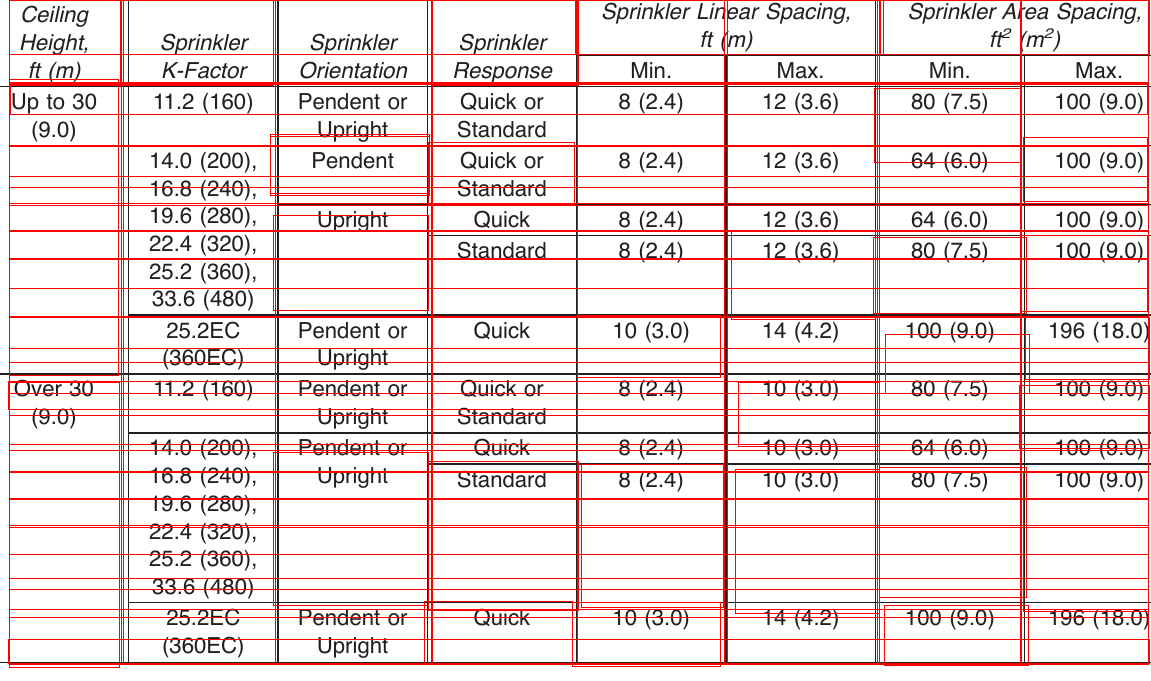

In [8]:
from PIL import ImageDraw

cropped_table_visualized = tables[0][0].image
draw = ImageDraw.Draw(cropped_table_visualized)

for cell in cells:
    if cell["score"] < 0.7:
        continue
    draw.rectangle(cell["bbox"], outline="red")

cropped_table_visualized

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_results(cells, class_to_visualize, tr, cropped_table, threshold=0.7):
    if class_to_visualize not in tr.srmodel.config.id2label.values():
      raise ValueError("Class should be one of the available classes")

    plt.figure(figsize=(16,10))
    plt.imshow(cropped_table)
    ax = plt.gca()

    for cell in cells:
        if cell["score"] < threshold:
            continue
        score = cell["score"]
        bbox = cell["bbox"]
        label = cell["label"]

        if label == class_to_visualize:
          xmin, ymin, xmax, ymax = tuple(bbox)

          ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color="red", linewidth=3))
          text = f'{cell["label"]}: {score:0.2f}'
          ax.text(xmin, ymin, text, fontsize=15,
                  bbox=dict(facecolor='yellow', alpha=0.5))
          plt.axis('off')
     

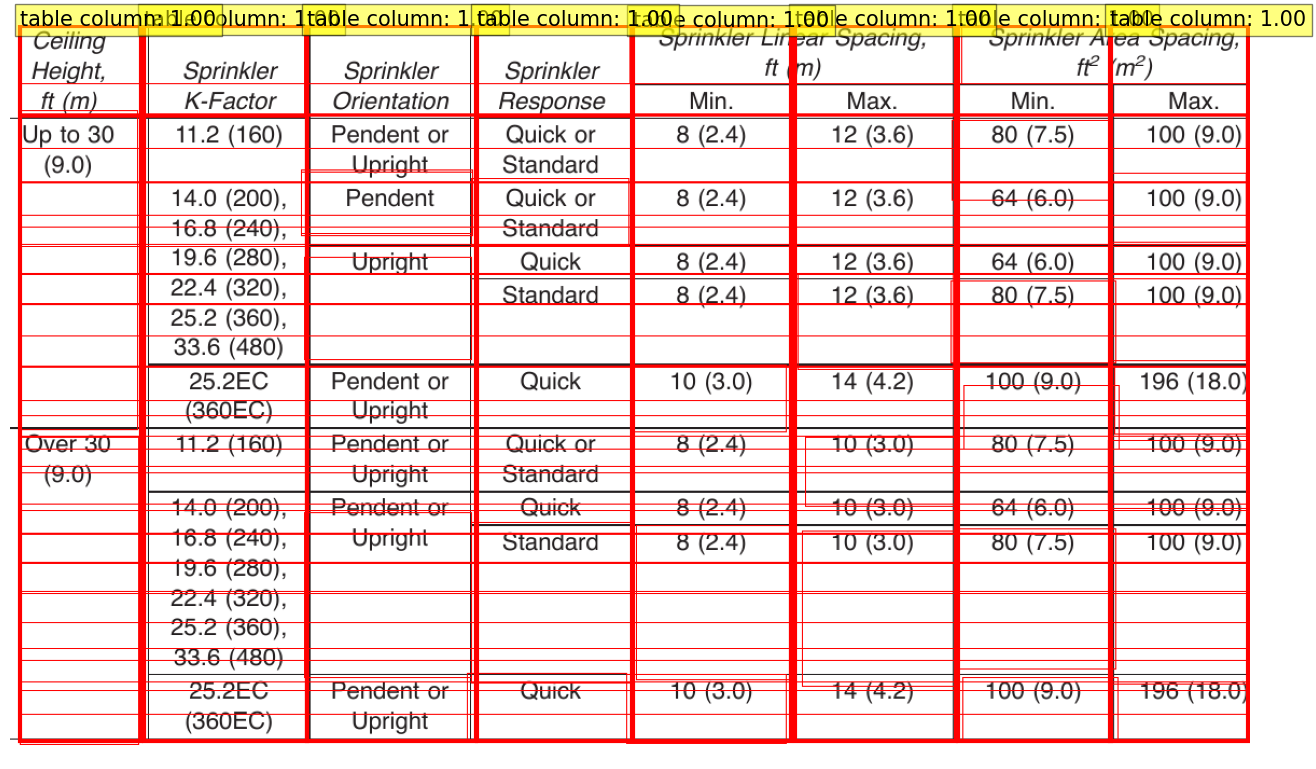

In [10]:
plot_results(cells, "table column", tr, cropped_table_visualized)

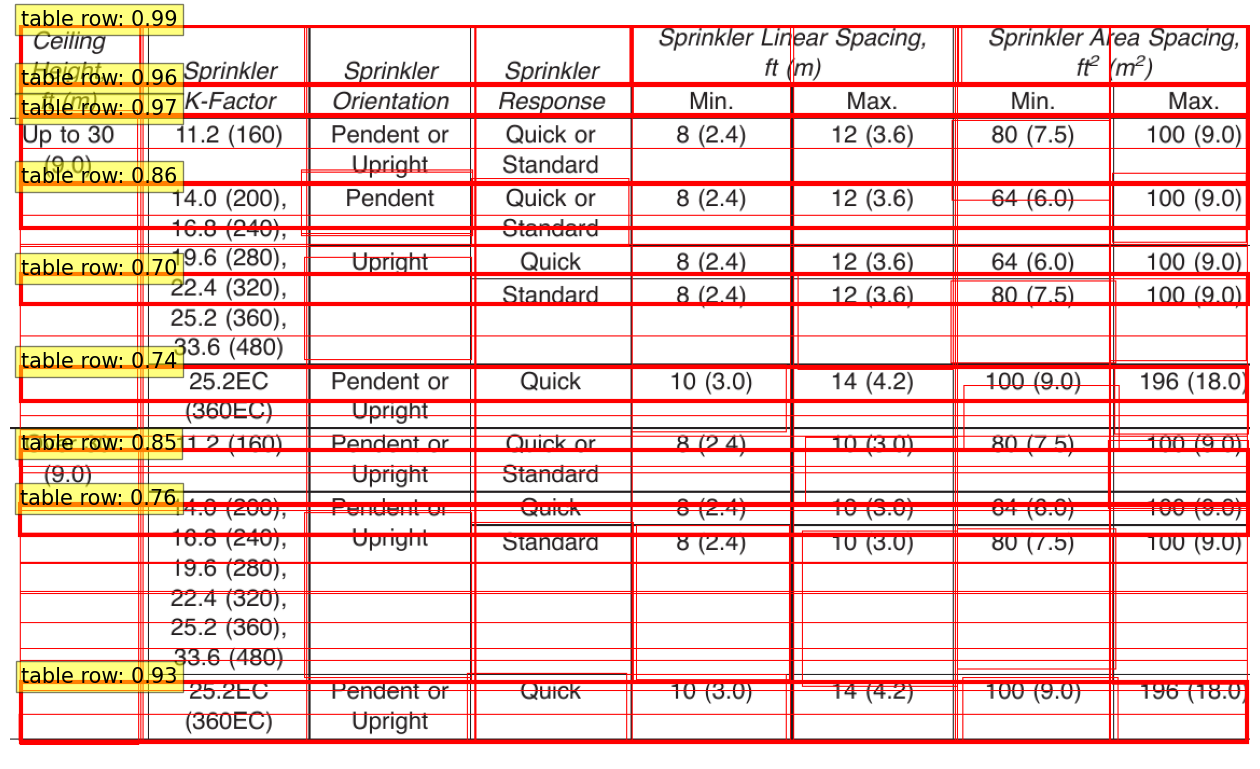

In [11]:
plot_results(cells, "table row", tr, cropped_table_visualized)